/tmp/ipykernel_280993/2087669083.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  map_scram2intact[start:start+int(duration[where])] = np.arange(starttime[where], endtime[where])
/tmp/ipykernel_280993/2087669083.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start +=int(duration[where])
/tmp/ipykernel_280993/2087669083.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  durations.append(int(duration[where]))
/tmp/ipykernel_280993/2087669083.py:41: Deprec

i: 242
i: 35
i: 52
d: 225
d: 71
i: 190
d: 138
d: 208
i: 155
d: 173
d: 122
i: 260
d: 17
i: 88
d: 280
d: 105
[103, 209, 276, 346, 421, 527, 566]
[276, 313, 346, 382, 458, 491, 527, 566, 599]


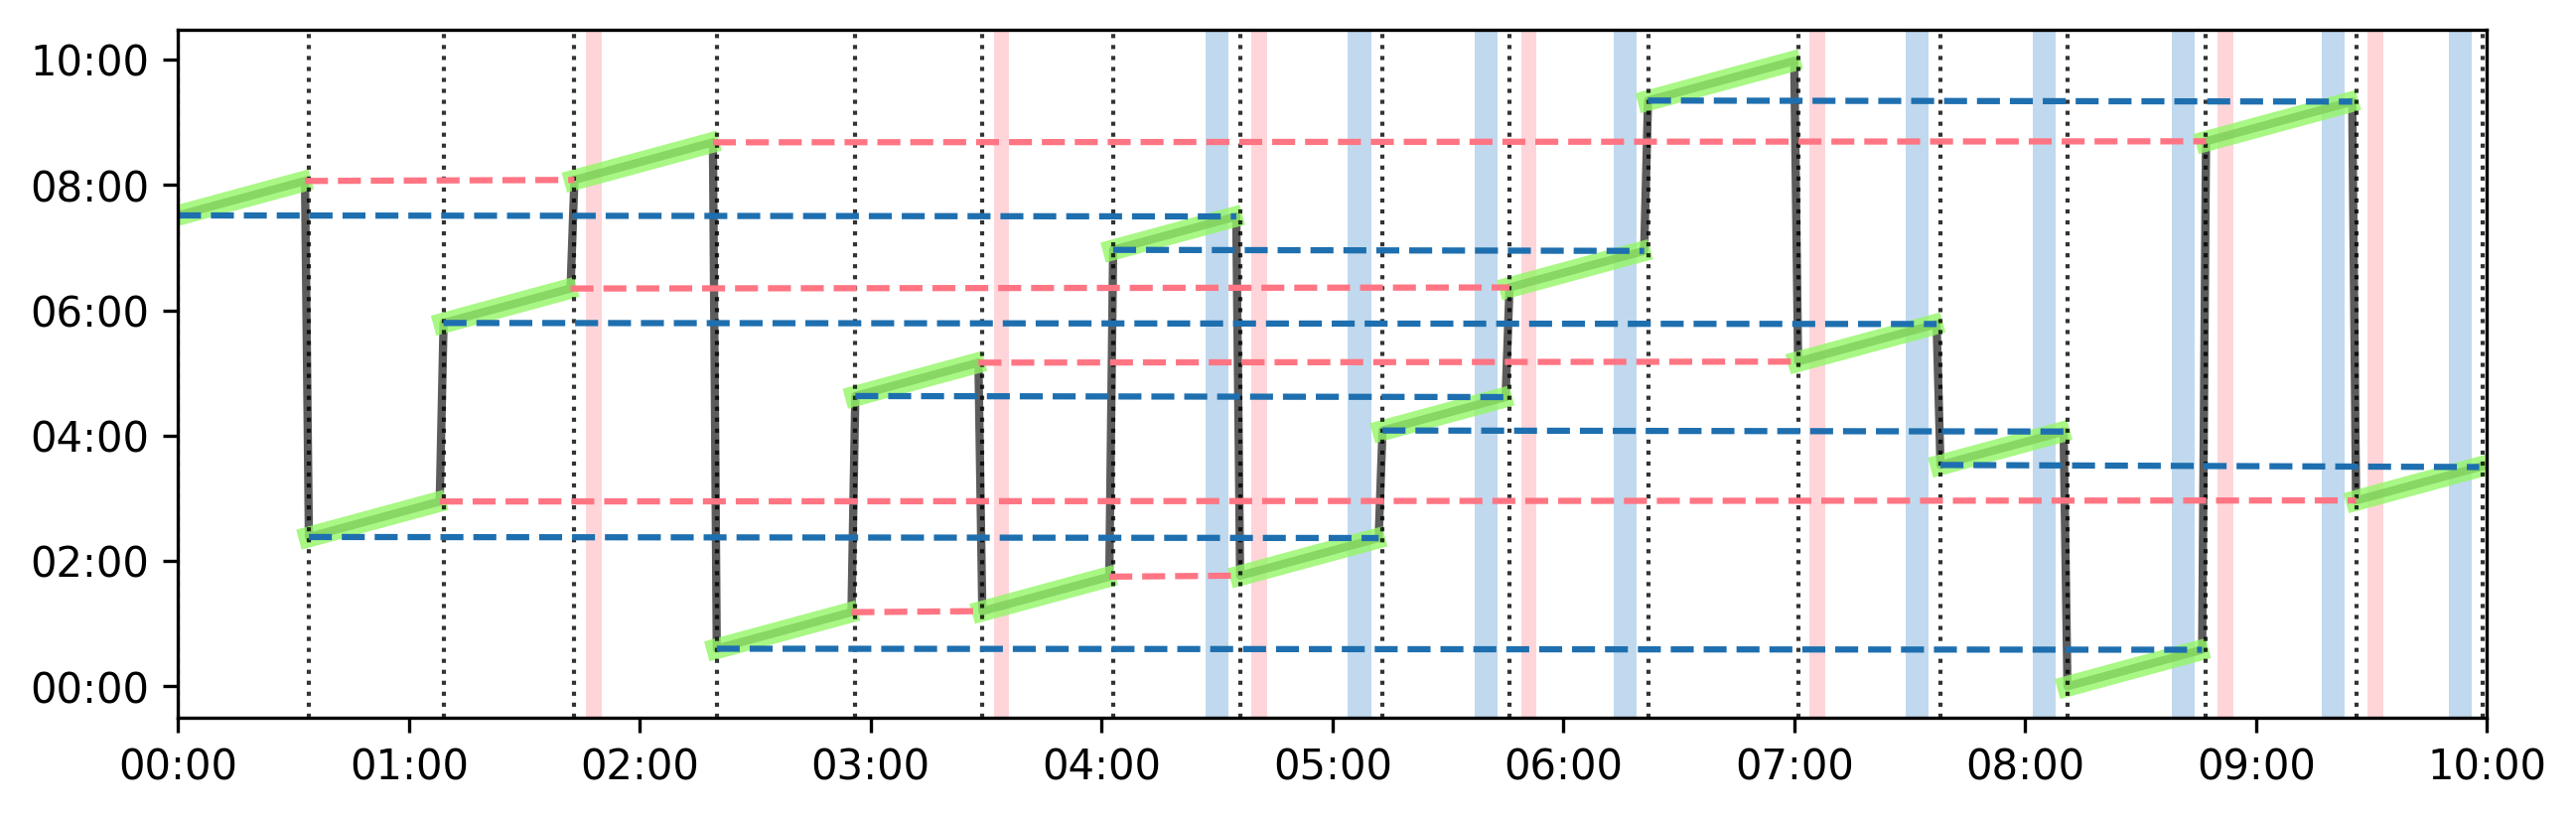

In [22]:
import numpy as np
from scipy.stats import rankdata, ttest_rel, ttest_1samp
from scipy.stats import zscore

from matplotlib import pyplot as plt

plt.style.use('default')

def scrambled_intact_map():
    order = []
    duration = []
    endtime = []
    with open('utils/event_time.txt','r') as f:
        for line in f:
            line = line.replace('\n','')
            line_split = line.split('\t')

            order.append(int(line_split[0]))
            duration.append( int(line_split[1].split(':')[1])*60 + int(line_split[1].split(':')[2]))
            endtime.append(int(line_split[2].split(':')[1]) * 60 + int(line_split[2].split(':')[2]))

    endtime = np.array(endtime)
    duration = np.array(duration)
    starttime = endtime - duration
    order = np.array(order)

    index = 1
    start = 0
    map_scram2intact = np.zeros(600)
    durations = []
    for i in range(len(order)):
        where = np.where(order == index)[0]
        map_scram2intact[start:start+int(duration[where])] = np.arange(starttime[where], endtime[where])
        start +=int(duration[where])
        index += 1
        durations.append(int(duration[where]))

    map_intact2scram = np.zeros(600)
    for i in range(600):
        where = np.where(map_scram2intact == i)[0]
        map_intact2scram[i] = int(where)
    return map_scram2intact.astype(int), map_intact2scram.astype(int), durations


map_s2i, map_i2s, durations = scrambled_intact_map()

plt.figure(figsize=(10,3), dpi=300)
plt.plot(map_i2s, lw=2, c='#333333', linestyle='-', alpha=0.8)
start = 0
for i in range(1, len(map_i2s)):
    if np.abs(map_i2s[i] - map_i2s[i-1]) == 1:
        pass
    else:
        end = i-1
        plt.plot(np.arange(start, i-1), map_i2s[start:i-1], lw=5, c='#94F667', linestyle='-', alpha=0.8)
        start = i
plt.plot(np.arange(start, 600), map_i2s[start:], lw=5, c='#94F667', linestyle='-', alpha=0.8)
scene_change = np.array([0, 34,  69,  103, 140, 176, 209, 243, 276,
                         313, 346, 382, 421, 458, 491, 527, 566, 599])
for s in scene_change:
    plt.axvline(s, c='k',lw=1, alpha=0.8, linestyle=':')
    #plt.text(s, 10, str(s), va='center', ha='center', fontsize=8)

prev_endtimes = []
prev_statimes = [map_i2s[0]]
forward_boundaries = []
backward_boundaries = []
for t in range(1, 600):
    if map_i2s[t] - map_i2s[t-1] != 1:
        prev_endtimes.append(map_i2s[t-1])
        prev_statimes.append(map_i2s[t])
        if map_i2s[t]-1 in prev_endtimes:
            link = np.where(np.isin(prev_endtimes, map_i2s[t]-1))[0][0]
            #print('Forward: ', map_s2i[prev_endtimes[link]],  t)
            forward_boundaries.append(t)
            plt.plot([map_s2i[prev_endtimes[link]],  t], [prev_endtimes[link], map_i2s[t]], c='#ff7583', lw=1.5, linestyle='--')
            plt.axvspan(t+3,  t+7,  facecolor='#ff7583', alpha=0.3, edgecolor=None)
            print("i:", int(np.mean([prev_endtimes[link], map_i2s[t]])/2))

        if map_i2s[t-1]+1 in prev_statimes:
            link = np.where(np.isin(prev_statimes, map_i2s[t-1]+1))[0][0]
            #print('Backward: ', map_s2i[prev_statimes[link]],  t-1)
            backward_boundaries.append(t)
            plt.plot([map_s2i[prev_statimes[link]],  t-1], [prev_statimes[link], map_i2s[t-1]], c='#1E6FAF', lw=1.5, linestyle='--')
            print("d:", int(np.mean([prev_statimes[link], map_i2s[t-1]])/2))
            plt.axvspan(t-9,  t-3,  facecolor='#3084c9', alpha=0.3, edgecolor=None)

    if t==599:
        if map_i2s[t]+1 in prev_statimes:
            link = np.where(np.isin(prev_statimes, map_i2s[t]+1))[0][0]
            #print('Backward: ', map_s2i[prev_statimes[link]],  t-1)
            backward_boundaries.append(t)
            plt.plot([map_s2i[prev_statimes[link]],  t-1], [prev_statimes[link], map_i2s[t-1]], c='#1E6FAF', lw=1.5, linestyle='--')
            plt.axvspan(t-9,  t-3,  facecolor='#3084c9', alpha=0.3, edgecolor=None)
            print("d:", int(np.mean([prev_statimes[link], map_i2s[t-1]])/2))

print(forward_boundaries)
print(backward_boundaries)


def get_timeformat(seconds):
    m, s = divmod(seconds, 60)
    string = f'{m:02d}:{s:02d}'
    return string

plt.plot([0,0], [0,0], c='#3084c9', lw=1.5, linestyle='--', label='End-of-event')
plt.plot([0,0], [0,0], c='#ff7583', lw=1.5, linestyle='--', label='Event-onset')
# plt.legend()
plt.xlim(0, 600)
plt.xticks(np.arange(0,610,60),[get_timeformat(s) for s in np.arange(0,610,60)])
plt.yticks(np.arange(0,610,120),[get_timeformat(s) for s in np.arange(0,610,120)])
plt.show()


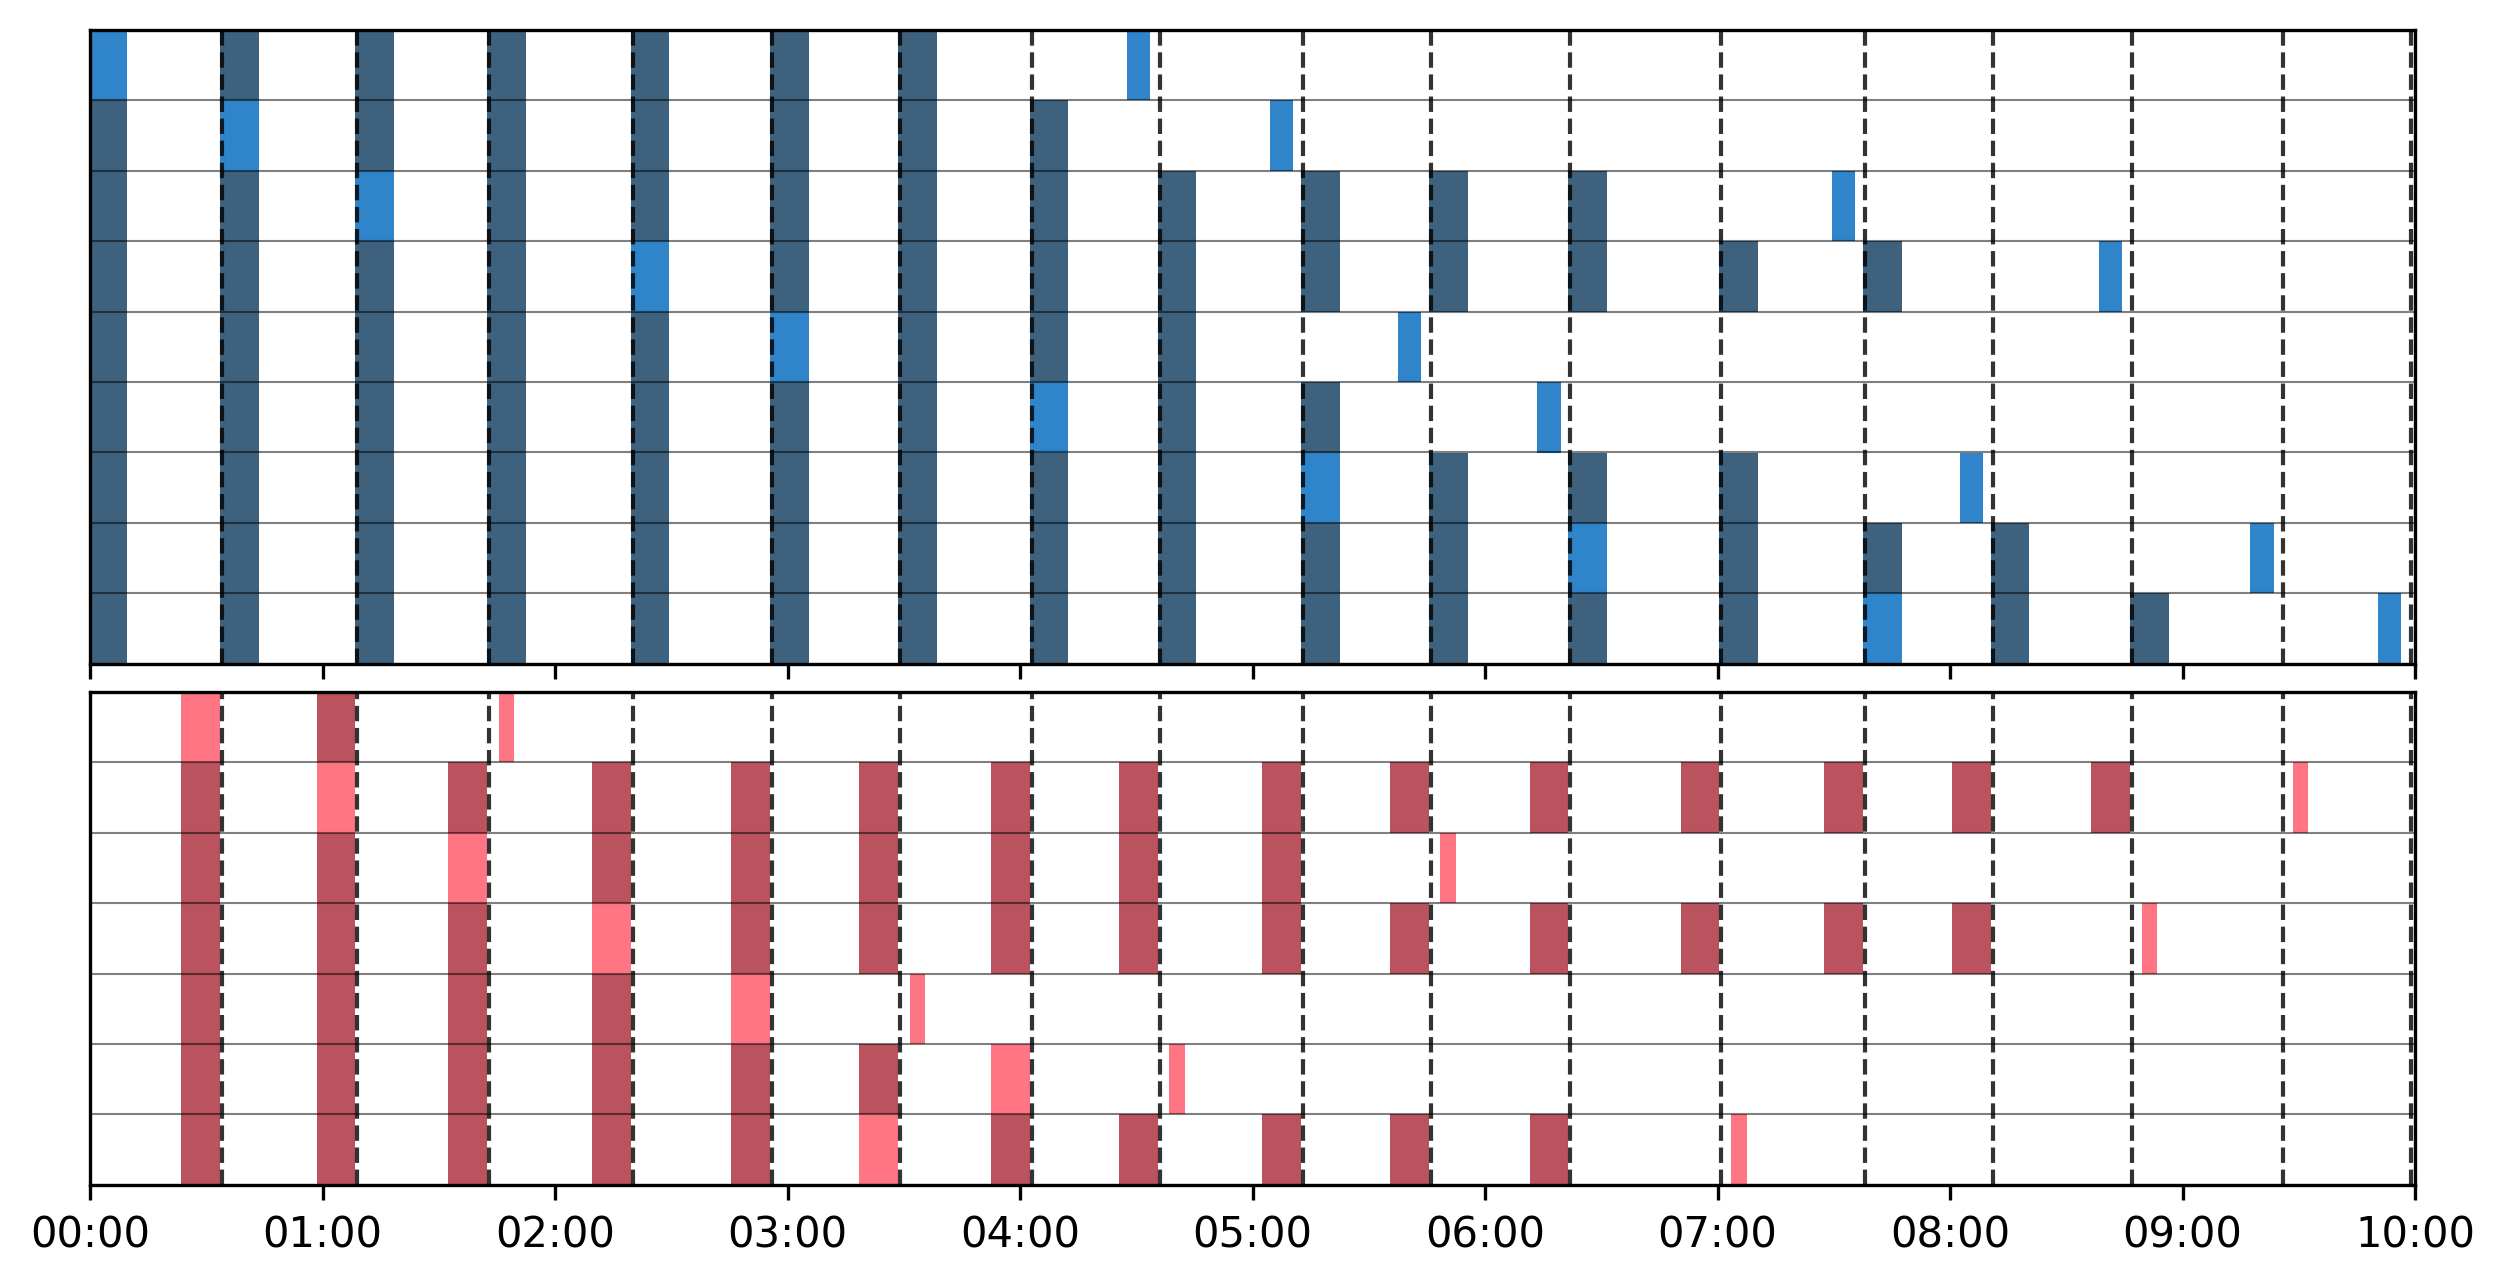

In [6]:
from matplotlib.colors import from_levels_and_colors
import pickle

with open('utils/movie/backward_retrieval_related.pkl', 'rb') as f:
    backward_retrieval_related = pickle.load(f)
with open('utils/movie/backward_retrieval_unrelated.pkl', 'rb') as f:
    backward_retrieval_unrelated = pickle.load(f)

with open('utils/movie/forward_retrieval_related.pkl', 'rb') as f:
    forward_retrieval_related = pickle.load(f)
with open('utils/movie/forward_retrieval_unrelated.pkl', 'rb') as f:
    forward_retrieval_unrelated = pickle.load(f)

backward_related_color = '#3084c9'
backward_unrelated_color = '#3e627e'
forward_related_color = '#ff7583'
forward_unrelated_color = '#ba535e'

cmap, norm = from_levels_and_colors([0, 1, 2, 3, 4, 5], ['white', backward_related_color,backward_unrelated_color,
                                                                  forward_related_color,forward_unrelated_color ])
scene_change = np.array([34,  69,  103, 140, 176, 209, 243, 276,
                         313, 346, 382, 421, 458, 491, 527, 566, 599])

duration = 10
unrelated_idx = 0
n_backward_retrieval_unrelateds = [6, 7, 11, 13, 8, 9, 12, 14, 15]
backward_retrieval_matrix = np.zeros((len(backward_retrieval_related),610))
for p, pair in enumerate(backward_retrieval_related):
    backward_retrieval_matrix[p,pair[0]:pair[0]+duration] = 1
    backward_retrieval_matrix[p,pair[1]-8:pair[1]-2] = 1
    for pp, ppair in enumerate(backward_retrieval_unrelated[unrelated_idx:unrelated_idx+n_backward_retrieval_unrelateds[p]]):
        backward_retrieval_matrix[p,ppair[0]:ppair[0]+duration] = 2
    unrelated_idx += n_backward_retrieval_unrelateds[p]

unrelated_idx = 0
n_forward_retrieval_unrelateds = [1, 14, 8, 13, 4, 6, 10]
forward_retrieval_matrix = np.zeros((len(forward_retrieval_related),610))
for p, pair in enumerate(forward_retrieval_related):
    forward_retrieval_matrix[p,pair[0]-duration:pair[0]] = 3
    forward_retrieval_matrix[p,pair[1]+3:pair[1]+7] = 3
    for pp, ppair in enumerate(forward_retrieval_unrelated[unrelated_idx:unrelated_idx+n_forward_retrieval_unrelateds[p]]):
        forward_retrieval_matrix[p,ppair[0]-duration:ppair[0]] = 4
    unrelated_idx += n_forward_retrieval_unrelateds[p]

fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=300, sharex=True, gridspec_kw={'height_ratios':[9,7]})

axes[0].imshow(backward_retrieval_matrix, aspect='auto', interpolation='none', cmap=cmap, vmin=0, vmax=5)
axes[0].set_yticks(np.arange(-0.5, len(backward_retrieval_related), 1), minor=True)
axes[0].grid(which='minor', color='k', lw=0.5, alpha=0.5)

axes[1].imshow(forward_retrieval_matrix, aspect='auto', interpolation='none', cmap=cmap, vmin=0, vmax=5)
axes[1].set_yticks(np.arange(-0.5, len(forward_retrieval_related), 1), minor=True)
axes[1].grid(which='minor', color='k', lw=0.5, alpha=0.5)

for s in scene_change:
    for ax in axes:
        ax.axvline(s, c='k',lw=1, alpha=0.8, linestyle='--')
for ax in axes:
    ax.set_yticks([])
    ax.yaxis.set_tick_params(which='minor', bottom=False)

def get_timeformat(seconds):
    m, s = divmod(seconds, 60)
    string = f'{m:02d}:{s:02d}'
    return string
plt.xticks(np.arange(0,610,60),[get_timeformat(s) for s in np.arange(0,610,60)])
plt.xlim(0.0, 600)
plt.subplots_adjust(hspace=0.05)